<a href="https://colab.research.google.com/github/Inna-Grynishak/Inna-Grynishak/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота №5
студентки КН-31 **Гринішак Інни**\
**Тема**: Convolutional Neural Networks and Computer Vision with TensorFlow\
\
**Завдання:** \
1. На основі документу вирішити завдання класифікації зображень їжі для 3 класів з набору даних food101.
2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком групи.
3. Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
4. Результати викласти у репозиторії GitHub (папка Lab5).
5. Підготуватися до захисту лабораторної роботи (пояснення коду, відповіді на запитання за темою)
- Варіант 5   

# Завдання 1
На основі документу вирішити завдання класифікації для набору даних.

In [2]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("101_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

# Перевірка на вміст
!ls 101_food_classes_10_percent

--2022-05-07 11:05:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 142.250.99.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   133MB/s    in 10s     

2022-05-07 11:05:47 (148 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]

test  train


# Завдання 2
Для моделювання використати 3 класи індекси яких взяти відповідно до 5-го варіанту(3 класи: 4, 34, 64)



['beef_tartare', 'eggs_benedict', 'miso_soup']

 Image shape: (512, 512, 3)


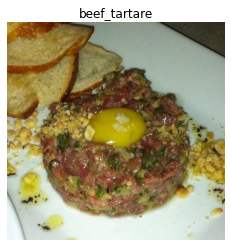

In [3]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

data_dir = pathlib.Path("101_food_classes_10_percent/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
my_class_names = [class_names[4], class_names[34], class_names[64]]
print(my_class_names)

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"\n Image shape: {img.shape}") # show the shape of the image

  return img

img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class=my_class_names[0])

In [4]:
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

from pathlib import Path
import shutil

for i in class_names:
  if i not in my_class_names:
    dirpath = Path(train_dir) / i
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath)
    dirpath = Path(test_dir) / i
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath) 
!ls 101_food_classes_10_percent/train/
!ls 101_food_classes_10_percent/test/

beef_tartare  eggs_benedict  miso_soup
beef_tartare  eggs_benedict  miso_soup


Імпортування даних з каталогів і перетворення їх на пакети


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, 
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(test_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


# Завдання 3
Навчання нейронної мережі

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
model = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax')
])

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_model = model.fit(train_data_augmented,
                          epochs=30,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/30
24/24 [==============================] - 47s 2s/step - loss: 1.2180 - accuracy: 0.4200 - val_loss: 0.9423 - val_accuracy: 0.5333
Epoch 2/30
24/24 [==============================] - 47s 2s/step - loss: 0.9534 - accuracy: 0.5320 - val_loss: 0.9133 - val_accuracy: 0.5511
Epoch 3/30
24/24 [==============================] - 46s 2s/step - loss: 0.9018 - accuracy: 0.5800 - val_loss: 0.8060 - val_accuracy: 0.6489
Epoch 4/30
24/24 [==============================] - 47s 2s/step - loss: 0.8513 - accuracy: 0.5987 - val_loss: 0.8120 - val_accuracy: 0.6756
Epoch 5/30
24/24 [==============================] - 46s 2s/step - loss: 0.8504 - accuracy: 0.6160 - val_loss: 0.7556 - val_accuracy: 0.6978
Epoch 6/30
24/24 [==============================] - 46s 2s/step - loss: 0.8086 - accuracy: 0.6427 - val_loss: 0.7013 - val_accuracy: 0.7111
Epoch 8/30
24/24 [==============================] - 49s 2s/step - loss: 0.7461 - accuracy: 0.6600 - val_loss: 0.8027 - val_accuracy: 0.6311
Epoch 9/30
24/24 [==

# Завдання 4
Криві точності та втрат

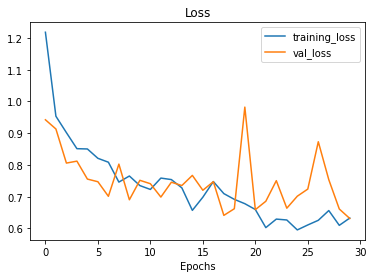

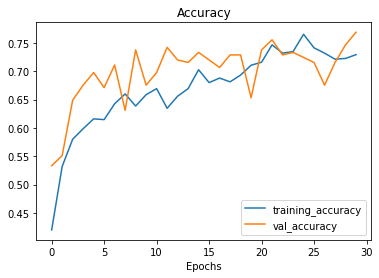

In [7]:
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
  
plot_loss_curves(history_model)

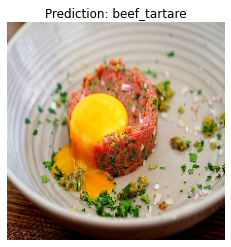

In [8]:
def load_and_prep_image(filename, img_shape=224):

  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.
  return img
def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1: 
    pred_class = class_names[pred.argmax()] 
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] 

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
pred_and_plot(model, "1.jpg", my_class_names)

# Висновок
В ході лабораторної роботи було вивчено особливості задачі класифікації.